In [1]:
import tensorflow as tf
from google.colab import drive
from google.colab import files
import os
import cv2
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath=os.listdir('drive/MyDrive/RPLP')
for sub in filepath:
  print(sub)

Person 8
Person 9
Person 1
Person 7
Person 2
Person 6
Person 10
Person 4
Person 5
Person 3


In [3]:
train_dir='drive/MyDrive/RPLP'
training_data=[]

In [4]:
def create_trainingdata():
    categories=os.listdir(train_dir)
    for sub in categories:
        path=os.path.join(train_dir,sub)
        class_num=categories.index(sub)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(250,250))
            training_data.append([new_array,class_num])

In [5]:
create_trainingdata()

In [6]:
random.shuffle(training_data)

In [7]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)

X=np.array(X).reshape(-1,250,250,3)
Y=np.array(Y).reshape(-1,1)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [9]:
x_train.shape

(5625, 250, 250, 3)

In [15]:
cnn=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(250,250,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
        ])

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])   

In [16]:
model1=cnn.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
176/176 [==============================] - 28s 156ms/step - loss: 4.1999 - accuracy: 0.2949 - val_loss: 1.2957 - val_accuracy: 0.3152
Epoch 2/50
176/176 [==============================] - 27s 153ms/step - loss: 1.2327 - accuracy: 0.4523 - val_loss: 1.3072 - val_accuracy: 0.3285
Epoch 3/50
176/176 [==============================] - 27s 152ms/step - loss: 1.3520 - accuracy: 0.3019 - val_loss: 1.2326 - val_accuracy: 0.3461
Epoch 4/50
176/176 [==============================] - 29s 164ms/step - loss: 1.2856 - accuracy: 0.3305 - val_loss: 1.1541 - val_accuracy: 0.5280
Epoch 5/50
176/176 [==============================] - 27s 153ms/step - loss: 0.9157 - accuracy: 0.6366 - val_loss: 0.5582 - val_accuracy: 0.7941
Epoch 6/50
176/176 [==============================] - 27s 153ms/step - loss: 0.6137 - accuracy: 0.7753 - val_loss: 0.3970 - val_accuracy: 0.8480
Epoch 7/50
176/176 [==============================] - 27s 152ms/step - loss: 0.4692 - accuracy: 0.8373 - val_loss: 0.3451 - val_ac

In [22]:
cnn.save("CNNRPLP.h5")

In [17]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

59/59 [==============================] - 4s 67ms/step - loss: 0.0744 - accuracy: 0.9776


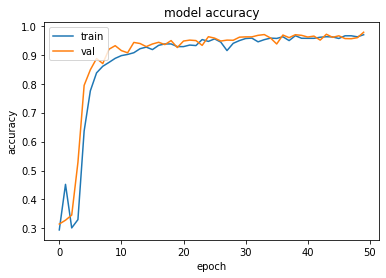

In [18]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

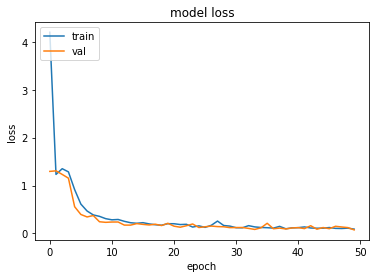

In [19]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model_pred=cnn.predict(x_test)
model_pred=np.argmax(model_pred[:20],axis=1)
actual=y_test[:20].reshape(-1)

print("Prediction:")
print(model_pred)
print("Actual :")
print(actual)

Prediction:
[4 3 2 9 1 8 4 7 4 8 1 9 3 2 8 5 3 0 7 0]
Actual :
[4 3 2 9 1 8 4 7 4 8 1 9 3 2 8 5 3 0 7 0]
